#### Pytorch Overview

In [1]:
# importando pytorch
import torch
print(torch.__version__)

2.3.1


In [ ]:
# checando se cuda está disponível
torch.cuda.is_available()

##### Tensors

In [19]:
x = torch.rand(5, 3)
print(x)
print(x.dtype)

z = torch.zeros(5, 3)
print(z)
print(z.dtype)

i = torch.ones((5, 3), dtype=torch.int16)
print(i)
print(i.dtype)

tensor([[0.7521, 0.4235, 0.5898],
        [0.8424, 0.0914, 0.7897],
        [0.5790, 0.3263, 0.2385],
        [0.6103, 0.3524, 0.5535],
        [0.9546, 0.9193, 0.5928]])
torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.int16


In [25]:
# seed de inicialização

torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print(r1)

r2 = torch.rand(2, 2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print(r3)

tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [28]:
# operações com tensores

ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [40]:
r = torch.rand(2, 2) - 0.5 * 2
print(r)
print(torch.abs(r))
print(torch.asin(r))
print(torch.det(r))
print(torch.svd(r))
print(torch.std(r))
print(torch.mean(r))
print(torch.std_mean(r))
print(torch.max(r))

tensor([[-0.7976, -0.4269],
        [-0.2809, -0.5933]])
tensor([[0.7976, 0.4269],
        [0.2809, 0.5933]])
tensor([[-0.9232, -0.4411],
        [-0.2847, -0.6352]])
tensor(0.3533)
torch.return_types.svd(
U=tensor([[-0.8295, -0.5585],
        [-0.5585,  0.8295]]),
S=tensor([1.0676, 0.3309]),
V=tensor([[ 0.7666,  0.6421],
        [ 0.6421, -0.7666]]))
tensor(0.2222)
tensor(-0.5247)
(tensor(0.2222), tensor(-0.5247))
tensor(-0.2809)


##### Autograd

In [59]:
x = torch.randn(1, 10, requires_grad=True) # pra não dar erro no loss.backward()
prev_h = torch.randn(1, 20)
W_h = torch.randn(20, 20)
W_x = torch.randn(20, 10)

i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())
next_h = i2h + h2h
next_h = next_h.tanh()

loss = next_h.sum()
loss.backward() # calcula o gradient a partir do erro

##### Building models

In [64]:
import torch # for all things
import torch.nn as nn # for nn.Module
import torch.nn.functional as F # for activation function

In [68]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) # input, output, kernel
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 16 * 6 * 6 deve ser a aplicação de um Flatten
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2)) # or F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.view(-1, self.num_flat_features(x)) # isso é pra não calcular o flatten na mão
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *=s
        return num_features

In [69]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [70]:
input = torch.randn(1, 1, 32, 32)
print(input.shape)

torch.Size([1, 1, 32, 32])


In [71]:
output = net(input)
print(output.shape)

torch.Size([1, 10])


In [73]:
print('Input:')
print(input)
print(input.shape)

print('Output:')
print(output)
print(output.shape)

Input:
tensor([[[[ 1.4652,  1.1184,  0.2155,  ..., -0.9557,  0.9225,  1.7604],
          [-1.0437, -1.4549, -0.3023,  ..., -0.1577,  0.6842,  1.1887],
          [-2.0105, -0.0577,  1.1693,  ...,  2.4587,  0.1752,  0.2460],
          ...,
          [ 0.6481,  1.4040,  0.2605,  ...,  1.7032, -0.3378,  0.5688],
          [ 0.8748,  0.8799, -0.6099,  ...,  0.3335,  1.7095,  0.3615],
          [-0.2494,  0.7931,  0.7104,  ...,  0.4113, -1.1289,  0.4619]]]])
torch.Size([1, 1, 32, 32])
Output:
tensor([[ 0.0119, -0.0574,  0.1344, -0.0078, -0.0502, -0.0729,  0.0188, -0.0931,
         -0.0541, -0.1071]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


##### Dataset and Dataloaders

In [75]:
%pip install matplotlib -q
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

In [103]:
# transforma tensor para imagem
tensor = torch.rand(3, 32, 32)
transform = transforms.ToPILImage()
img = transform(tensor)
img.show()

In [108]:
# transforma entrada para tensor e aplica normalização (0, 0.5)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(.5, .5, .5), std=(.5, .5, .5))])


In [109]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

Files already downloaded and verified


In [110]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

tensor([6, 5, 1, 4])
 frog   dog   car  deer


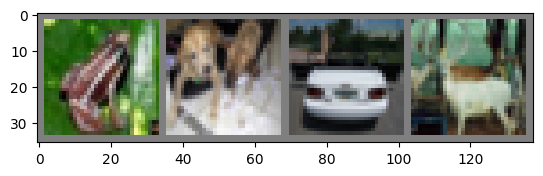

In [114]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(labels)
print(' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

##### Training the Model

In [123]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3) # input, output, kernel
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 16 * 6 * 6 deve ser a aplicação de um Flatten
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2)) # or F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = x.view(-1, self.num_flat_features(x)) # isso é pra não calcular o flatten na mão
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *=s
        return num_features

In [124]:
net = LeNet()

In [125]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [126]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters())
#optimizer = optim.SGD(net.parameters())

In [127]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i +1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 1.854
[1,  4000] loss: 1.594
[1,  6000] loss: 1.480
[1,  8000] loss: 1.413
[1, 10000] loss: 1.380
[1, 12000] loss: 1.327
[2,  2000] loss: 1.242
[2,  4000] loss: 1.250
[2,  6000] loss: 1.213
[2,  8000] loss: 1.190
[2, 10000] loss: 1.193
[2, 12000] loss: 1.185


In [128]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 55 %


##### Deployment with TorchScript

In [129]:
my_script_module = torch.jit.script(net)
my_script_module.save("./data/my_script_module.pt")

In [130]:
loaded_module = torch.jit.load("./data/my_script_module.pt")
print(loaded_module)

RecursiveScriptModule(
  original_name=LeNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (fc1): RecursiveScriptModule(original_name=Linear)
  (fc2): RecursiveScriptModule(original_name=Linear)
  (fc3): RecursiveScriptModule(original_name=Linear)
)
